Image selected : stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png
Original image shape: (256, 256, 4)
New image shape: (256, 256)


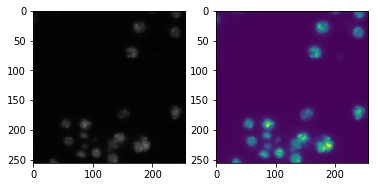

In [1]:
import pathlib
import imageio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

training_paths = pathlib.Path('./stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[0]
im = imageio.imread(str(im_path))

# Print the image dimensions
print('Image selected : {}'.format(im_path))
print('Original image shape: {}'.format(im.shape))

# Coerce the image into grayscale format (if not already)
from skimage.color import rgb2gray
im_gray = rgb2gray(im)
print('New image shape: {}'.format(im_gray.shape))

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.imshow(im)
ax1 = fig.add_subplot(1,2,2)
plt.imshow(im_gray)
plt.show()

In [2]:
# Removing the background from the image
from skimage.filters import threshold_otsu

thresh_val = threshold_otsu(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

In [3]:
from scipy import ndimage
labels, nlabels = ndimage.label(mask)

label_arrays = []
for label_num in range(1, nlabels+1):
    label_mask = np.where(labels == label_num, 1, 0)
    label_arrays.append(label_mask)

print('There are {} separate components / objects detected.'.format(nlabels))

There are 21 separate components / objects detected.


In [7]:
for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = im_gray[label_coords]
    print label_coords
    
    # Check if the label size is too small
    if np.product(cell.shape) < 10: 
        mask = np.where(labels==label_ind+1, 0, mask)

# Regenerate the labels
labels, nlabels = ndimage.label(mask)
print('There are now {} separate components / objects detected.'.format(nlabels))

(slice(0L, 5L, None), slice(190L, 207L, None))
(slice(0L, 14L, None), slice(232L, 248L, None))
(slice(9L, 19L, None), slice(0L, 4L, None))
(slice(20L, 38L, None), slice(168L, 188L, None))
(slice(28L, 46L, None), slice(230L, 246L, None))
(slice(62L, 80L, None), slice(156L, 176L, None))
(slice(160L, 184L, None), slice(230L, 249L, None))
(slice(166L, 182L, None), slice(144L, 162L, None))
(slice(182L, 202L, None), slice(77L, 98L, None))
(slice(183L, 198L, None), slice(47L, 63L, None))
(slice(204L, 216L, None), slice(79L, 92L, None))
(slice(205L, 237L, None), slice(125L, 156L, None))
(slice(210L, 240L, None), slice(168L, 197L, None))
(slice(212L, 228L, None), slice(52L, 68L, None))
(slice(225L, 232L, None), slice(81L, 91L, None))
(slice(231L, 248L, None), slice(97L, 114L, None))
(slice(235L, 248L, None), slice(73L, 89L, None))
(slice(239L, 256L, None), slice(124L, 143L, None))
(slice(249L, 256L, None), slice(28L, 41L, None))
There are now 19 separate components / objects detected.


In [22]:
# Get the object indices, and perform a binary opening procedure
two_cell_indices = ndimage.find_objects(labels)[1]
cell_mask = mask[two_cell_indices]
cell_mask_opened = ndimage.binary_opening(cell_mask, iterations=8)
